## **통계모델링 3주차**
### 250319
### 상관분석과 회귀분석

In [ ]:
!pip install sklearn
!pip install pandas
!pip install seaborn
!pip install matplotlib

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
!pip install statsmodels

#### **데이터 불러오기**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_splitfrom sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_openml

boston = fetch_openml(name="boston", version=1,as_frame=True)
df = boston.frame
print(df.head())
print(df.describe())

      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
             CRIM          ZN       INDUS         NOX          RM         AGE  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.554695    6.284634   68.574901   
std      8.601545   23.322453    6.860353    0.115878    0.702617   28.148861   
min      0.006320    0.000000    0.460000    

#### **상관분석**

##### 1. 모든 변수 쌍 간의 상관관계 확인

In [ ]:
corr_matrix = df.corr()

히트맵 시각화

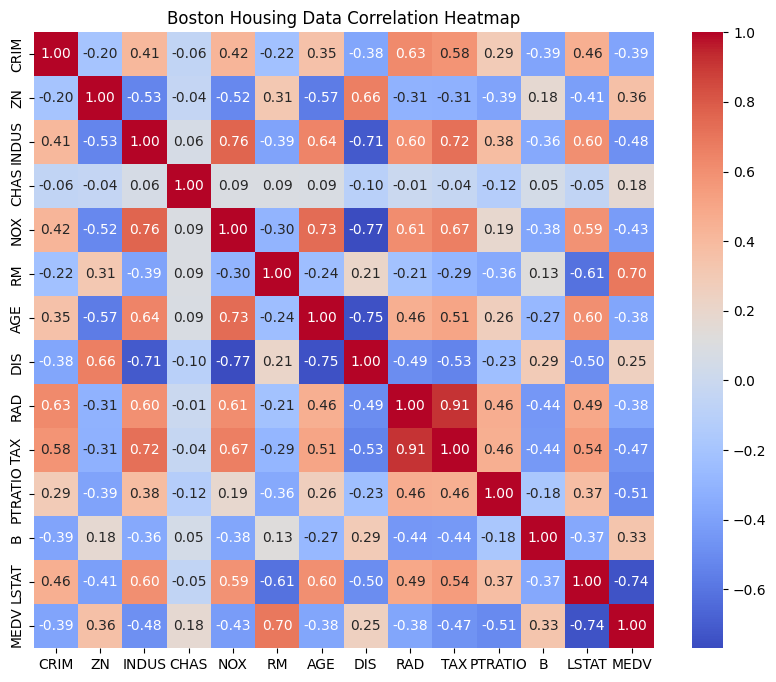

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Boston Housing Data Correlation Heatmap')
plt.show()

##### 2. 방 개수와 주택 가격 간의 상관관계 및 산점도 시각화

In [ ]:
import scipy.stats as stats

df2 = df[['RM', 'MEDV']].dropna()
corr, p_value = stats.pearsonr(df2['RM'], df2['MEDV'])

결과 출력

In [ ]:
print(f"Pearson Correlation Coefficient (RM vs MEDV): {corr:.4f}")
print(f"p-value: {p_value:.4f}")

Pearson Correlation Coefficient (RM vs MEDV): 0.6954
p-value: 0.0000


유의수준 5%에서 검정 결과 해석

In [ ]:
alpha = 0.05
if p_value < alpha:
  print("유의수준 5%에서 RM과 MEDV사이에 유의미한 상관관계가 있음.")
else:
  print("유의수준 5%에서 RM과 MEDV사이의 상관관계가 유의미하지 않음.")

유의수준 5%에서 RM과 MEDV사이에 유의미한 상관관계가 있음.


###### 2-1. 시각화

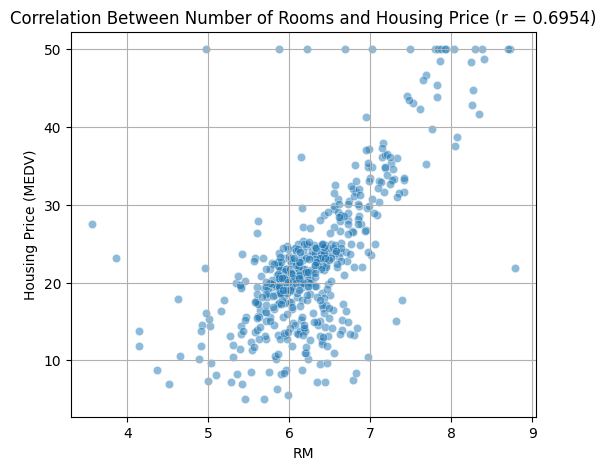

In [ ]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x=df['RM'], y=df['MEDV'], alpha=0.5) # Pure scatter plotplt.xlabel('Number of Rooms (RM)')
plt.ylabel('Housing Price (MEDV)')
plt.title(f'Correlation Between Number of Rooms and Housing Price (r = {corr:.4f})')
plt.grid(True)
plt.show()

###### 2-2. 가설검정 - 결과해석

상관계수 r이 0보다 크기 때문에 양의 상관관계를 가진다.
절댓값이 0.6954로 꽤 강한 양의 상관관계임을 알 수 있다.
즉 RM (방의 개수)가 클수록(많을수록) 주택가격이 높음을 의미한다.

귀무가설 H0: 두 변수 간의 상관관계가 없다.
대립가설 H1: 두 변수 간에 상관관계가 존재한다.p-value는 0.0000<0.05 이므로 유의수준 5% 기준으로 귀무가설을 기각할 수 있으며, 방 개수와 주택가격 간의 상관성이 존재한다고 할 수 있다.

#### **회귀분석**

##### 1. 방 개수에 따른 주택 가격 예측 - 단순선형회귀

독립변수(x)와 종속변수(y) 정의

In [ ]:
boston = fetch_openml(name="boston", version=1, as_frame=True)
df = boston.frame
df = df[['RM', 'MEDV']].dropna()
X = df[['RM']].values.reshape(-1, 1) # 방 개수, 2D
y = df['MEDV'] # 주택가격

데이터셋 분할

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

선형 회귀 모델 생성 및 학습

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

회귀계수 출력

In [ ]:
print("회귀계수:", model.coef_)
print("절편:", model.intercept_)

회귀계수: [9.34830141]
절편: -36.24631889813795


예측 및 평가

In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("평균제곱오차(MSE):", mse)

평균제곱오차(MSE): 46.144775347317264


##### 2. 시각화

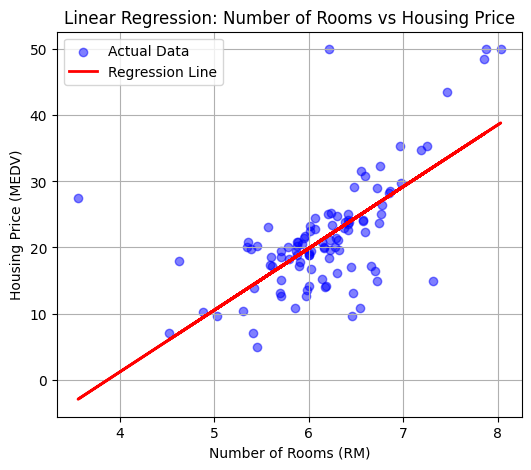

In [ ]:
plt.figure(figsize=(6, 5))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label="Actual Data")
plt.plot(X_test, y_pred, color='red', linewidth=2,
label="Regression Line")
plt.xlabel('Number of Rooms (RM)')
plt.ylabel('Housing Price (MEDV)')
plt.title('Linear Regression: Number of Rooms vs Housing Price')
plt.legend()
plt.grid(True)
plt.show()

##### 3. 결과 해석

In [ ]:
print(f"추정 회귀식: MEDV = {model.intercept_:.4f} + {model.coef_[0]:.4f} * RM")


추정 회귀식: MEDV = -36.2463 + 9.3483 * RM


##### 4. R^2 (결정계수) 값

#### 참고자료

https://datascienceschool.net/03%20machine%20learning/04.01%20%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D%20%EC%98%88%EC%A0%9C.html